In [21]:
from cmath import * 
import math
from tokenize import Double 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pan
import random
from scipy.interpolate import make_interp_spline
from scipy.spatial import ConvexHull
import mpl_toolkits.mplot3d 
import matplotlib

In [22]:
'algorithm to find the roots of a cubic polynomial'

def solve(a3, a2, a1, a0):
    """ Numeric solutions of a cubic equation
    a3 * x^3 + a2 * x^2 + a1 * x + a0 = 0
    """
    a3, a2, a1, a0 = map(float, [a3, a2, a1, a0])

    if a3 == a2 == a1 == 0:
        raise ValueError("a3, a2 or a1 should be non-zero value.")

    if a3 == a2 == 0:
        return - a0 / a1,

    if a3 == 0:
        if a1 ** 2 - 4 * a2 * a0 == 0:
            return -a1 / (2.0 * a2),

        x0 = (-a1 + cmath.sqrt(a1 ** 2 - 4 * a2 * a0)) / (2.0 * a2)
        x1 = (-a1 - cmath.sqrt(a1 ** 2 - 4 * a2 * a0)) / (2.0 * a2)
        return x0, x1

    # Cardano's method
    A2 = a2 / a3
    A1 = a1 / a3
    A0 = a0 / a3

    p = A1 - (A2 ** 2) / 3.0
    q = A0 - A1 * A2 / 3.0 + 2 * (A2 ** 3) / 27.0
    u = (q / 2.0) ** 2 + (p / 3.0) ** 3

    if u >= 0:
        k0 = -q / 2.0 + math.sqrt(u) ** (1 / 3.0)
        k1 = -q / 2.0 - math.sqrt(u) ** (1 / 3.0)
    else:
        k0 = (-q / 2.0 + cmath.sqrt(u)) ** (1 / 3.0)
        k1 = (-q / 2.0 - cmath.sqrt(u)) ** (1 / 3.0)
    omega1 = (-1 + 1j * math.sqrt(3)) / 2.0
    omega2 = (-1 - 1j * math.sqrt(3)) / 2.0
    y0 = k0 + k1
    y1 = omega1 * k0 + omega2 * k1
    y2 = omega2 * k0 + omega1 * k1

    return y0 - (A2 / 3.0), y1 - (A2 / 3.0), y2 - (A2 / 3.0)

In [23]:
'Writng the Rk4 algorithm, but as a customized function with variable input values'
def rk4(t,n):
    x0p=0;y0=1;z0=0;h1=0.0001

    def f(x0,y0,z0,n):
        z=-x0*x0*pow(y0,n);
        return z

    def g(x0,y0,z0):
        return z0/pow(x0,2)

    xaxis=[];yaxis=[]
    h = h1/10;
    x0= x0p+ 0.00001;
    k1=0;l1=0;k2=0;l2=0;l3=0;l4=0;k3=0;k4=0;y0=1;z0=0;c=0
    while True:
        k1 = h * g (x0, y0, z0);
        l1 = h * f (x0, y0, z0, n);

        k2 = h * g (x0 + (h/2), y0 + (k1/2), z0 +(l1/2));
        l2 = h * f (x0 + (h/2), y0 + (k1/2), z0 +(l1/2), n);

        k3 = h * g (x0 + (h/2), y0 + (k2/2), z0 +(l2/2));
        l3 = h * f (x0 + (h/2), y0 + (k2/2), z0 +(l2/2), n);

        k4 = h * g (x0 + (h/2), y0 + (k3), z0 +(l3));
        l4 = h * f (x0 + (h/2), y0 + (k3), z0 +(l3), n);

        y1 = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6;
        z1 = z0 + (l1 + 2 * l2 + 2 * l3 + l4) / 6;
        y0 = y1;
        z0 = z1;
        x0 = x0 + h;
        #if y0<0:
        #    break
        if y0<=t:
            break
    return x0


In [24]:
'generating the x coordinates for n=2,3.5,4 for same footing of y (represented by YM) coordinates'

YM=[];j=0.00
for item in range(1,101):
    YM.append(j)
    j+=0.01

X2=[];X35=[];X4=[];i=0
for item in YM:
    X2.append(rk4(YM[i],2))
    X35.append(rk4(YM[i],3.5))
    X4.append(rk4(YM[i],4))
    i+=1

'Now, we have 3 lists of 100 points each for same 100 y coordinates'

'Now, we have 3 lists of 100 points each for same 100 y coordinates'

In [25]:
'Performing cubic spline with 3 points'
'Code below contains only the final expression for the cubic equation built between the indices 2 and 3.5 as ou index was lying between them, i.e., 2<3<3.5'

'here, a,b,c,d are the leading coefficients of the cubic polynomial of the form ax^3 + bx^2 + cx + d = 0'
'and x1, x2, x3 denotes the roots of the formed cubic equation'

i=0;X3=[];YN=[] 
for item in YM:
    a=1
    h=X35[i]-X2[i]
    b=-3*X2[i]
    c=3*pow(X2[i],2) - 8*pow(h,2)
    d=12*pow(h,3) + 16*X2[i]*h*h - pow(X2[i],3) - 8*X35[i]*h*h
    x1,x2,x3 = solve(a,b,c,d)
    if x1.imag == 0:
        if X2[i] <= x1.real <= X35[i]:
            r1=x1.real
            X3.append(r1)
            YN.append(YM[i])
    if x2.imag == 0:
        if X2[i] <= x2.real <= X35[i]: 
            r2=x2.real
            X3.append(r2)
            YN.append(YM[i])
    if x3.imag == 0:
        if X2[i] <= x3.real <= X35[i]: 
            r3=x3.real
            X3.append(r3)
            YN.append(YM[i])
    i+=1

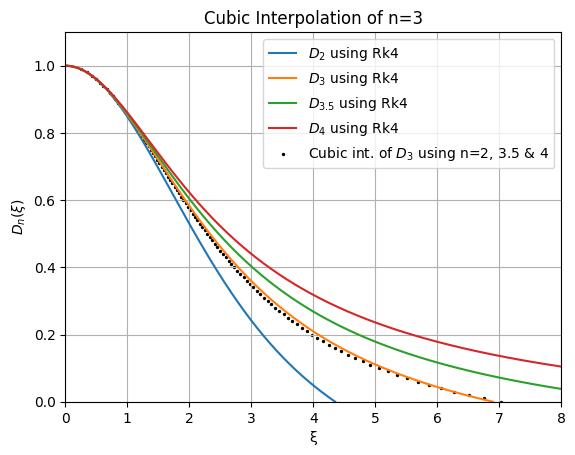

In [26]:
'Now, writing the Rk4 algorithm to plot the numerical data for n=2, 3, 3.5 & 4'

x0p=0;y0=1;z0=0;h1=0.0001;t=10

def f(x0,y0,z0,n):
    z=-x0*x0*pow(y0,n);
    return z

def g(x0,y0,z0):
    return z0/pow(x0,2)

N=[2,3,3.5,4]
i=0
for item in N:
    n=N[i]
    xaxis=[];yaxis=[]
    h = h1/10;
    x0= x0p+ 0.00001;
    k1=0;l1=0;k2=0;l2=0;l3=0;l4=0;k3=0;k4=0;y0=1;z0=0;c=0
    while (x0 < t):
        k1 = h * g (x0, y0, z0);
        l1 = h * f (x0, y0, z0, n);

        k2 = h * g (x0 + (h/2), y0 + (k1/2), z0 +(l1/2));
        l2 = h * f (x0 + (h/2), y0 + (k1/2), z0 +(l1/2), n);

        k3 = h * g (x0 + (h/2), y0 + (k2/2), z0 +(l2/2));
        l3 = h * f (x0 + (h/2), y0 + (k2/2), z0 +(l2/2), n);

        k4 = h * g (x0 + (h/2), y0 + (k3), z0 +(l3));
        l4 = h * f (x0 + (h/2), y0 + (k3), z0 +(l3), n);

        y1 = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6;
        z1 = z0 + (l1 + 2 * l2 + 2 * l3 + l4) / 6;
        y0 = y1;
        z0 = z1;

        xaxis.append(x0);
        yaxis.append(y0);
        x0 = x0 + h;
        if y0 < 0:
            break;
    if n==2:
        plt.plot(xaxis,yaxis, label='$D_2$ using Rk4')
    if n==3:
        plt.plot(xaxis,yaxis, label='$D_3$ using Rk4')
    if n==3.5:
        plt.plot(xaxis,yaxis, label='$D_{3.5}$ using Rk4')
    if n==4:
        plt.plot(xaxis,yaxis, label='$D_4$ using Rk4')
    i+=1



plt.xlabel('\u03BE')
plt.ylabel('$D_n(\u03BE)$')
plt.xlim(0,8)
plt.ylim(0,1.1)
plt.title('Cubic Interpolation of n=3')


plt.scatter(X3,YN,label='Cubic int. of $D_3$ using n=2, 3.5 & 4', color='black',s=2)
plt.grid()
plt.legend(prop={'size':10})
plt.show()